# Movie Recommendation System

Kevin Nolasco

Cabrini University

MCIS560 - Intro to Machine Learning

03/18/2022

Recommendation systems are one of the greatest innovations that use Machine Learning. Instead of having to spend minutes to hours searching the topics that are relevant to what you are interested in, an algorithm can do the searching for you! For this project we will focus on Movie Recommendations. We will use data taken from [the movies dataset in Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset) and apply 3 recommendation systems. The first method will use a movie's overview and genres to find similar movies to recommend. The second method will use a movie's cast and crew, and the third will use both methods. Below you can see a flow chart that describes the way we will use the data to build the model.

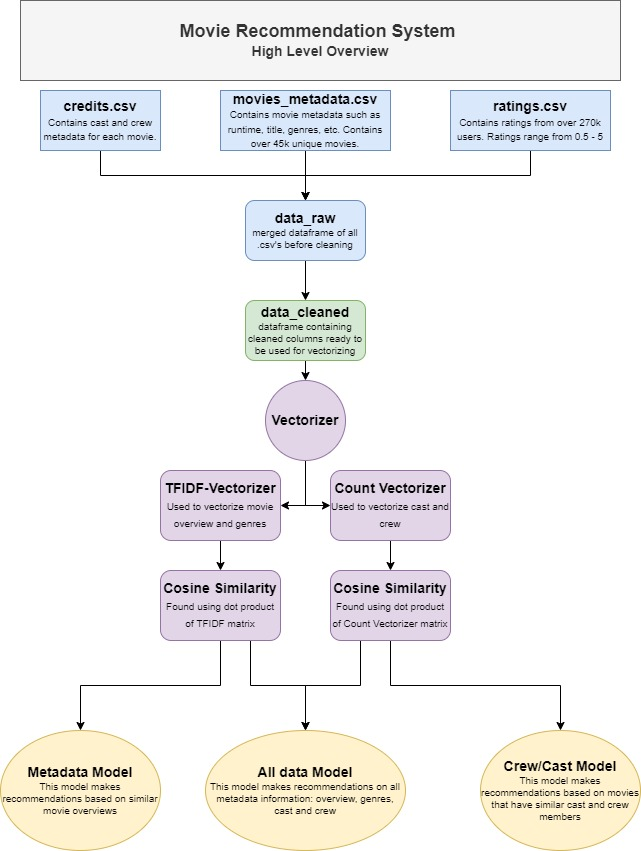

In [220]:
import pandas as pd
import os

In [221]:
CWD = os.getcwd()
DATA_DIR = os.path.join(CWD, 'data')


In [213]:
ratings_df = pd.read_csv(os.path.join(DATA_DIR, 'ratings.csv'))

In [111]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [112]:
ratings_df.shape

(26024289, 4)

# EDA

In [113]:
n_users = ratings_df['userId'].nunique()
print('Avg number of ratings per user: {}'.format(int(ratings_df.shape[0] / n_users)))

Avg number of ratings per user: 96


In [215]:
ratings_df['userId'].nunique()

270896

In [114]:
ratings_df.groupby('rating').size()

rating
0.5     404897
1.0     843310
1.5     403607
2.0    1762440
2.5    1255358
3.0    5256722
3.5    3116213
4.0    6998802
4.5    2170441
5.0    3812499
dtype: int64

In [115]:
movies_metadata_df = pd.read_csv(os.path.join(DATA_DIR, 'movies_metadata.csv'))

C:\Users\nolas\AppData\Local\Temp\ipykernel_14508\2140507666.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata_df = pd.read_csv(os.path.join(DATA_DIR, 'movies_metadata.csv'))


In [116]:
movies_metadata_df.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [117]:
movies_metadata_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [118]:
movies_metadata_df.shape

(45466, 24)

In [119]:
ratings_df['movieId'].nunique()

45115

In [120]:
import re
def find_date(id):
    return bool(re.match('^[0-9]+$', id))

In [121]:
movies_metadata_df['keep_row'] = movies_metadata_df['id'].apply(find_date)

In [122]:
movies_metadata_df['keep_row'].value_counts()

True     45463
False        3
Name: keep_row, dtype: int64

In [123]:
movies_metadata_df[movies_metadata_df['keep_row'] == False]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keep_row
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [124]:
movies_metadata_df = movies_metadata_df[movies_metadata_df['keep_row'] == True]
movies_metadata_df['keep_row'].value_counts()

True    45463
Name: keep_row, dtype: int64

In [125]:
movies_metadata_df['id'] = movies_metadata_df['id'].astype('int64')
movies_metadata_df.dtypes

C:\Users\nolas\AppData\Local\Temp\ipykernel_14508\3686544064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_metadata_df['id'] = movies_metadata_df['id'].astype('int64')


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
keep_row                    bool
dtype: object

In [126]:
data = ratings_df.merge(movies_metadata_df.add_suffix('_movies'), left_on = 'movieId', right_on = 'id_movies', how = 'inner')
data.shape

(11437637, 29)

## Highest Rated Movie on Avg.

In [127]:
data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'adult_movies',
       'belongs_to_collection_movies', 'budget_movies', 'genres_movies',
       'homepage_movies', 'id_movies', 'imdb_id_movies',
       'original_language_movies', 'original_title_movies', 'overview_movies',
       'popularity_movies', 'poster_path_movies',
       'production_companies_movies', 'production_countries_movies',
       'release_date_movies', 'revenue_movies', 'runtime_movies',
       'spoken_languages_movies', 'status_movies', 'tagline_movies',
       'title_movies', 'video_movies', 'vote_average_movies',
       'vote_count_movies', 'keep_row_movies'],
      dtype='object')

In [128]:
avg_rating = data.groupby(by = 'movieId')['rating'].mean().reset_index(name = 'avg_rating').sort_values(by = 'avg_rating', ascending = False)
n_ratings = data.groupby(by = 'movieId').size().reset_index(name = 'num_ratings')

In [129]:
all_ratings = avg_rating.merge(n_ratings, on = 'movieId', how = 'inner')
all_ratings.head()

,movieId,avg_rating,num_ratings
0,95977,5.0,1
1,167666,5.0,1
2,130544,5.0,1
3,129530,5.0,1
4,164278,5.0,1


Make rating categories so we can see highest rated movies with most votes.

In [130]:
def rating_categories(avg_rating):
    if avg_rating >= 4.5:
        return '4.5+'
    elif avg_rating >= 4:
        return '4-4.5'
    elif avg_rating >= 3:
        return '3-4'
    elif avg_rating >= 2:
        return '2-3'
    else:
        return 'low'

In [131]:
all_ratings['rating_category'] = all_ratings['avg_rating'].apply(rating_categories)

In [132]:
all_ratings['rating_category'].value_counts()

3-4      4735
2-3      2179
low       342
4-4.5     264
4.5+       45
Name: rating_category, dtype: int64

In [133]:
top_10_each_category = all_ratings.sort_values(by = 'num_ratings', ascending = False).groupby(by = 'rating_category').head(10)

In [134]:
top_10_each_category[top_10_each_category['rating_category'] == '4.5+']

,movieId,avg_rating,num_ratings,rating_category
38,109441,4.50,4,4.5+
41,106113,4.50,3,4.5+
40,169496,4.50,2,4.5+
39,161094,4.50,2,4.5+
43,95578,4.50,2,4.5+
16,164777,4.75,2,4.5+
22,169022,4.50,2,4.5+
21,129360,4.50,2,4.5+
28,101538,4.50,2,4.5+
0,95977,5.00,1,4.5+


In [135]:
movies_metadata_df.merge(top_10_each_category[top_10_each_category['rating_category'] == '4.5+'], left_on = 'id', right_on = 'movieId', how = 'inner')[['original_title', 'num_ratings','avg_rating']].sort_values(by = 'num_ratings', ascending = False)

,original_title,num_ratings,avg_rating
3,Don't Go Near the Water,4,4.50
6,Don't Tell the Wife,3,4.50
1,Hoop Reality,2,4.50
2,친구사이?,2,4.50
4,Evel Knievel,2,4.50
5,"Usain Bolt, La Légende",2,4.50
7,Kitchen,2,4.50
8,Il Magnifico Cornuto,2,4.75
9,The Gnomes' Great Adventure,2,4.50
0,The Man Behind The Gun,1,5.00


Looks like this dataset doesn't have many high rated movies. Let's see the next highest rating category.

In [136]:
movies_metadata_df.merge(top_10_each_category[top_10_each_category['rating_category'] == '4-4.5'], left_on = 'id', right_on = 'movieId', how = 'inner')[['original_title', 'num_ratings','avg_rating']].sort_values(by = 'num_ratings', ascending = False)

,original_title,num_ratings,avg_rating
5,The Million Dollar Hotel,91082,4.429015
8,Terminator 3: Rise of the Machines,87901,4.169975
4,Солярис,84078,4.152246
3,The 39 Steps,77045,4.132299
0,Once Were Warriors,67662,4.266531
1,Trois couleurs : Rouge,66512,4.016057
9,License to Wed,60024,4.230716
2,Sleepless in Seattle,57070,4.339811
6,5 Card Stud,56827,4.104167
7,Men in Black II,52474,4.105347


## Plan for Recommendation System

I would like to build a recommendation system that takes the ratings a user has made, and matches 10 movies that are most similar to the highest rated movies the user rated.
We will use the overview and genres of the movie to define *similarity*.

In [137]:
# clean genres column to be a list of genres seperated by space
import json

def extract_genre(genre):
    """
    use regex to find each dictionary in string,
    convert string to dictionary
    extract name
    return genres as single string
    """
    genre_str = genre.replace('[','').replace(']','').replace('\'', '\"')
    genre_list = []
    # loop through each dict in string using regex
    for small_dict in re.findall('\{.*?\}', genre_str):
        item_dict = json.loads(small_dict)
        genre_list.append(item_dict['name'])
    return ' '.join(genre_list)

In [138]:
movies_metadata_df['genres_cleaned'] = movies_metadata_df['genres'].apply(extract_genre)

In [139]:
movies_metadata_df[['genres_cleaned', 'genres']].iloc[0]

genres_cleaned                              Animation Comedy Family
genres            [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
Name: 0, dtype: object

In [140]:
def append_genres(df):
    return ' '.join([str(df['overview']), str(df['genres_cleaned'])])

In [141]:
# append genre to end of overview
movies_metadata_df['overview_final'] = movies_metadata_df.apply(append_genres, axis = 1)

In [142]:
movies_metadata_df['overview_final'].values[400]

"Starts off in the 15th century, with Connor McLeod (Christopher Lambert) training with another immortal swordsman, the Japanese sorcerer Nakano (Mako). When an evil immortal named Kane (Mario Van Peebles) kills the old wizard, the resulting battle leaves him buried in an underground cave. When Kane resurfaces in the 20th century to create havoc, it's up to McLeod to stop him. Action Fantasy Science Fiction"

### Count Vectorize the Overview

In [143]:
movies_metadata_df.drop_duplicates(subset = ['id'], inplace = True)

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

# instatiate object and remove stop words

tfidf = TfidfVectorizer(stop_words = 'english')

tfidf_mat = tfidf.fit_transform(movies_metadata_df['overview_final'])

Let's look at the shape of this matrix. Rows represent movies, columns represent words that describe the movie

In [145]:
tfidf_mat.shape

(45433, 75827)

Now we can find the cosine similarity score by using the dot product.

In [146]:
from sklearn.metrics.pairwise import linear_kernel

cos_similarity = linear_kernel(tfidf_mat, tfidf_mat)

In [147]:
movies_metadata_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'keep_row', 'genres_cleaned',
       'overview_final'],
      dtype='object')

In [148]:
movie_data = movies_metadata_df[['title', 'overview_final', 'id']]

In [149]:
def because_you_watched(movies):
    # get 3 top rated movies for a person
    for movie in movies:
        print('===========================================\n')
        print('Because you liked "{}" ... you may enjoy:'.format(movie))
        movie_names = top_5_similar(movie)
        for name in movie_names:
            print(name)
        print('\n===========================================\n')

def top_5_similar(movie):
    # get index of movie
    movie_index = movie_data[movie_data['title'] == movie].index[0]
    # get the row that corresponds to that movie in cosine similarity matrix
    row_of_interest = list(enumerate(cos_similarity[movie_index].reshape(-1)))
    # sort movies
    similar_movies_sorted = sorted(row_of_interest, key = lambda x: x[1], reverse = True)
    # top 5
    the_most_similar = similar_movies_sorted[1:6]
    # return movie names
    return [movie_data.iloc[idx]['title'] for idx, _ in the_most_similar]

In [150]:
user_test = ratings_df[ratings_df['userId'] == 6].merge(movies_metadata_df[['id','title']], left_on = 'movieId', right_on = 'id', how = 'inner')
user_favorite_movies = user_test.sort_values(by = 'rating')['title'].iloc[:2].values
user_favorite_movies

array(['Star Wars', 'Joe Versus the Volcano'], dtype=object)

In [151]:
because_you_watched(user_favorite_movies)


Because you liked "Star Wars" ... you may enjoy:
The Empire Strikes Back
The Star Wars Holiday Special
Star Wars: The Force Awakens
Return of the Jedi
Mad Dog Time



Because you liked "Joe Versus the Volcano" ... you may enjoy:
Paolo Barca, maestro elementare, praticamente nudista
Remonstrance
JLG/JLG: Self-Portrait in December
The Old Devil
The Murderers Are Among Us




## Similar Approach but with MetaData

Parse cast information.

In [152]:
credits_df = pd.read_csv(os.path.join(DATA_DIR, 'credits.csv'))

In [153]:
print(credits_df.shape)
credits_df.head()

(45476, 3)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [154]:
credits_df['cast'].iloc[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [155]:
class ClassParser:

    def __init__(self):
        self.issue_counter = 0
        self.cast_counter = 0

    def parse_cast(self, cast_str):
        cast_str = cast_str.replace('[','').replace(']','').replace('\'', '\"')
        cast_list = []
        # loop through each dict in string using regex
        for small_dict in re.findall('\{.*?\}', cast_str):
            try:
                item_dict = json.loads(small_dict)
                cast_list.append(item_dict['name'].replace(' ','').upper())
                self.cast_counter += 1
            except:
                self.issue_counter += 1
        return ' '.join(cast_list)

In [156]:
parser = ClassParser()
credits_df['cast_cleaned'] = credits_df['cast'].apply(parser.parse_cast)

In [157]:
# how many cast members were skipped?
print('Number of cast members we could not retrieve: {:,}'.format(parser.issue_counter))

print('Total Number of cast members retreived: {:,}'.format(parser.cast_counter))

Number of cast members we could not retrieve: 192,630
Total Number of cast members retreived: 369,844


In [158]:
credits_df['cast_cleaned'].iloc[0]

'TOMHANKS TIMALLEN DONRICKLES JIMVARNEY WALLACESHAWN JOHNRATZENBERGER ANNIEPOTTS JOHNMORRIS ERIKVONDETTEN LAURIEMETCALF R.LEEERMEY PENNJILLETTE'

Parse crew information

In [159]:
credits_df['crew'].iloc[0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [160]:
test_crew = credits_df['crew'].iloc[0].replace('[','').replace(']','').replace('\'', '\"')
for small_dict in re.findall('\{.*?\}', test_crew):
    print(small_dict)

{"credit_id": "52fe4284c3a36847f8024f49", "department": "Directing", "gender": 2, "id": 7879, "job": "Director", "name": "John Lasseter", "profile_path": "/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg"}
{"credit_id": "52fe4284c3a36847f8024f4f", "department": "Writing", "gender": 2, "id": 12891, "job": "Screenplay", "name": "Joss Whedon", "profile_path": "/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg"}
{"credit_id": "52fe4284c3a36847f8024f55", "department": "Writing", "gender": 2, "id": 7, "job": "Screenplay", "name": "Andrew Stanton", "profile_path": "/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg"}
{"credit_id": "52fe4284c3a36847f8024f5b", "department": "Writing", "gender": 2, "id": 12892, "job": "Screenplay", "name": "Joel Cohen", "profile_path": "/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg"}
{"credit_id": "52fe4284c3a36847f8024f61", "department": "Writing", "gender": 0, "id": 12893, "job": "Screenplay", "name": "Alec Sokolow", "profile_path": "/v79vlRYi94BZUQnkkyznbGUZLjT.jpg"}
{"credit_id": "52fe4284c3a36847f8024f67", "department":

To distinguish between cast and crew, we will take the "job" part of the crew and use it as a prefix to the name.

In [161]:
class CrewParser:

    def __init__(self):
        self.issue_counter = 0
        self.crew_counter = 0
        self.crew_counter_simple = 0

    def parse_crew_detailed(self, crew_str):
        crew_str = crew_str.replace('[','').replace(']','').replace('\'', '\"')
        crew_list = []
        # loop through each dict in string using regex
        for small_dict in re.findall('\{.*?\}', crew_str):
            try:
                item_dict = json.loads(small_dict)
            except:
                self.issue_counter += 1
            else:
                crew_list.append('_'.join([item_dict['job'].replace(' ','').lower(), item_dict['name'].replace(' ','').upper()]))
                self.crew_counter += 1
        return ' '.join(crew_list)
    
    def parse_crew_simple(self, crew_str):
        crew_str = crew_str.replace('[','').replace(']','').replace('\'', '\"')
        crew_list = []
        # loop through each dict in string using regex
        for small_dict in re.findall('\{.*?\}', crew_str):
            try:
                item_dict = json.loads(small_dict)
            except:
                self.issue_counter += 1
            else:
                crew_list.append(item_dict['name'].replace(' ','').upper())
                self.crew_counter_simple += 1
        return ' '.join(crew_list)

In [162]:
crew_parser = CrewParser()
credits_df['crew_detailed'] = credits_df['crew'].apply(crew_parser.parse_crew_detailed)

In [163]:
credits_df['crew_detailed'].iloc[0]

'director_JOHNLASSETER screenplay_JOSSWHEDON screenplay_ANDREWSTANTON screenplay_JOELCOHEN screenplay_ALECSOKOLOW executiveproducer_STEVEJOBS editor_LEEUNKRICH artdirection_RALPHEGGLESTON orchestrator_RANDYNEWMAN originalstory_JOHNLASSETER originalstory_PETEDOCTER originalstory_JOERANFT animationdirector_ASHBRANNON music_RANDYNEWMAN songs_RANDYNEWMAN originalstory_ANDREWSTANTON supervisinganimator_PETEDOCTER sounddesigner_GARYRYDSTROM animation_JIMMYHAYWARD animation_BUDLUCKEY animation_JEFFPIDGEON characterdesigner_BUDLUCKEY characterdesigner_ANDREWSTANTON characterdesigner_TOMHOLLOWAY soundre-recordingmixer_GARYRYDSTROM adrvoicecasting_MICKIEMCGOWAN'

In [164]:
# how many crew members were skipped?
print('Number of crew members we could not retrieve: {:,}'.format(crew_parser.issue_counter))

print('Total Number of crew members retreived: {:,}'.format(crew_parser.crew_counter))

Number of crew members we could not retrieve: 369,558
Total Number of crew members retreived: 94,756


In [165]:
credits_df['crew_simple'] = credits_df['crew'].apply(crew_parser.parse_crew_simple)

In [166]:
credits_df['crew_simple'].iloc[0]

'JOHNLASSETER JOSSWHEDON ANDREWSTANTON JOELCOHEN ALECSOKOLOW STEVEJOBS LEEUNKRICH RALPHEGGLESTON RANDYNEWMAN JOHNLASSETER PETEDOCTER JOERANFT ASHBRANNON RANDYNEWMAN RANDYNEWMAN ANDREWSTANTON PETEDOCTER GARYRYDSTROM JIMMYHAYWARD BUDLUCKEY JEFFPIDGEON BUDLUCKEY ANDREWSTANTON TOMHOLLOWAY GARYRYDSTROM MICKIEMCGOWAN'

In [167]:
# how many crew members were skipped?
print('Number of crew members we could not retrieve: {:,}'.format(crew_parser.issue_counter))

print('Total Number of crew members retreived: {:,}'.format(crew_parser.crew_counter_simple))

Number of crew members we could not retrieve: 739,116
Total Number of crew members retreived: 94,756


In [168]:
class AppendMetaData:

    def __init__(self, cols_to_append):
        self.cols_to_append = cols_to_append

    def append_cols(self, df):
        return ' '.join(df[col] for col in self.cols_to_append)

In [169]:
cols_to_append = ['crew_simple', 'crew_detailed', 'cast_cleaned']

data_2 = credits_df[['cast_cleaned','crew_detailed','crew_simple','id']].merge(movie_data, on = 'id', how = 'inner')
data_2.head()

,cast_cleaned,crew_detailed,crew_simple,id,title,overview_final
0,TOMHANKS TIMALLEN DONRICKLES JIMVARNEY WALLACE...,director_JOHNLASSETER screenplay_JOSSWHEDON sc...,JOHNLASSETER JOSSWHEDON ANDREWSTANTON JOELCOHE...,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,ROBINWILLIAMS JONATHANHYDE KIRSTENDUNST BRADLE...,screenplay_JONATHANHENSLEIGH originalmusiccomp...,JONATHANHENSLEIGH JAMESHORNER JOEJOHNSTON NANC...,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,WALTERMATTHAU JACKLEMMON ANN-MARGRET SOPHIALOR...,director_HOWARDDEUTCH characters_MARKSTEVENJOH...,HOWARDDEUTCH MARKSTEVENJOHNSON MARKSTEVENJOHNSON,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,LELAROCHON GREGORYHINES DENNISHAYSBERT MICHAEL...,director_FORESTWHITAKER producer_DEBORAHSCHIND...,FORESTWHITAKER DEBORAHSCHINDLER KENNETHEDMONDS,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,STEVEMARTIN DIANEKEATON MARTINSHORT KIMBERLYWI...,originalmusiccomposer_ALANSILVESTRI screenplay...,ALANSILVESTRI NANCYMEYERS NANCYMEYERS CHARLESS...,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [170]:
append_func = AppendMetaData(cols_to_append)
data_2['meta_final'] = data_2.apply(append_func.append_cols, axis = 1)

In [171]:
data_2['meta_final'].iloc[0]

'JOHNLASSETER JOSSWHEDON ANDREWSTANTON JOELCOHEN ALECSOKOLOW STEVEJOBS LEEUNKRICH RALPHEGGLESTON RANDYNEWMAN JOHNLASSETER PETEDOCTER JOERANFT ASHBRANNON RANDYNEWMAN RANDYNEWMAN ANDREWSTANTON PETEDOCTER GARYRYDSTROM JIMMYHAYWARD BUDLUCKEY JEFFPIDGEON BUDLUCKEY ANDREWSTANTON TOMHOLLOWAY GARYRYDSTROM MICKIEMCGOWAN director_JOHNLASSETER screenplay_JOSSWHEDON screenplay_ANDREWSTANTON screenplay_JOELCOHEN screenplay_ALECSOKOLOW executiveproducer_STEVEJOBS editor_LEEUNKRICH artdirection_RALPHEGGLESTON orchestrator_RANDYNEWMAN originalstory_JOHNLASSETER originalstory_PETEDOCTER originalstory_JOERANFT animationdirector_ASHBRANNON music_RANDYNEWMAN songs_RANDYNEWMAN originalstory_ANDREWSTANTON supervisinganimator_PETEDOCTER sounddesigner_GARYRYDSTROM animation_JIMMYHAYWARD animation_BUDLUCKEY animation_JEFFPIDGEON characterdesigner_BUDLUCKEY characterdesigner_ANDREWSTANTON characterdesigner_TOMHOLLOWAY soundre-recordingmixer_GARYRYDSTROM adrvoicecasting_MICKIEMCGOWAN TOMHANKS TIMALLEN DONRICKLES

In [172]:
data_2.drop_duplicates(subset = ['id'], inplace = True)

## Use Count Vectorizer

In [173]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(data_2['meta_final'])

In [174]:
count_matrix.shape

(45432, 111965)

In [175]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [184]:
class MovieRecommenderMeta:

    def __init__(self, df, similarity_matrix):
        self.df = df
        self.similarity_matrix = similarity_matrix

    def because_you_watched(self, movies):
        # get 3 top rated movies for a person
        for movie in movies:
            print('===========================================\n')
            print('Because you liked "{}" ... you may enjoy:'.format(movie))
            movie_names = self.top_5_similar(movie)
            for name in movie_names:
                print(name)
            print('\n===========================================\n')

    def top_5_similar(self, movie):
        # get index of movie
        movie_index = self.df[self.df['title'] == movie].index[0]
        # get the row that corresponds to that movie in cosine similarity matrix
        row_of_interest = list(enumerate(self.similarity_matrix[movie_index].reshape(-1)))
        # sort movies
        similar_movies_sorted = sorted(row_of_interest, key = lambda x: x[1], reverse = True)
        # top 5
        the_most_similar = similar_movies_sorted[1:6]
        # return movie names
        return [self.df.iloc[idx]['title'] for idx, _ in the_most_similar]

In [185]:
user_test = ratings_df[ratings_df['userId'] == 6].merge(movies_metadata_df[['id','title']], left_on = 'movieId', right_on = 'id', how = 'inner')
user_favorite_movies = user_test.sort_values(by = 'rating')['title'].iloc[:2].values
user_favorite_movies

array(['Star Wars', 'Joe Versus the Volcano'], dtype=object)

In [186]:
recommender = MovieRecommenderMeta(data_2, cosine_sim2)
recommender.because_you_watched(user_favorite_movies)


Because you liked "Star Wars" ... you may enjoy:
The Empire Strikes Back
Return of the Jedi
Electronic Labyrinth THX 1138 4EB
Empire of Dreams: The Story of the Star Wars Trilogy
Star Wars: Episode III - Revenge of the Sith



Because you liked "Joe Versus the Volcano" ... you may enjoy:
Baby on Board
Cops and Robbers
High Anxiety
Million Dollar Mystery
Caveman




### Put them both together.

In [203]:
all_data = movie_data.merge(data_2.drop(['overview_final', 'title'], axis = 1), on = 'id', how = 'inner')
all_data.shape

(45432, 7)

In [204]:
all_data.head()

,title,overview_final,id,cast_cleaned,crew_detailed,crew_simple,meta_final
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",862,TOMHANKS TIMALLEN DONRICKLES JIMVARNEY WALLACE...,director_JOHNLASSETER screenplay_JOSSWHEDON sc...,JOHNLASSETER JOSSWHEDON ANDREWSTANTON JOELCOHE...,JOHNLASSETER JOSSWHEDON ANDREWSTANTON JOELCOHE...
1,Jumanji,When siblings Judy and Peter discover an encha...,8844,ROBINWILLIAMS JONATHANHYDE KIRSTENDUNST BRADLE...,screenplay_JONATHANHENSLEIGH originalmusiccomp...,JONATHANHENSLEIGH JAMESHORNER JOEJOHNSTON NANC...,JONATHANHENSLEIGH JAMESHORNER JOEJOHNSTON NANC...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,15602,WALTERMATTHAU JACKLEMMON ANN-MARGRET SOPHIALOR...,director_HOWARDDEUTCH characters_MARKSTEVENJOH...,HOWARDDEUTCH MARKSTEVENJOHNSON MARKSTEVENJOHNSON,HOWARDDEUTCH MARKSTEVENJOHNSON MARKSTEVENJOHNS...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",31357,LELAROCHON GREGORYHINES DENNISHAYSBERT MICHAEL...,director_FORESTWHITAKER producer_DEBORAHSCHIND...,FORESTWHITAKER DEBORAHSCHINDLER KENNETHEDMONDS,FORESTWHITAKER DEBORAHSCHINDLER KENNETHEDMONDS...
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,11862,STEVEMARTIN DIANEKEATON MARTINSHORT KIMBERLYWI...,originalmusiccomposer_ALANSILVESTRI screenplay...,ALANSILVESTRI NANCYMEYERS NANCYMEYERS CHARLESS...,ALANSILVESTRI NANCYMEYERS NANCYMEYERS CHARLESS...


In [205]:
## Vectorize and Similarities

# for overview and genre
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_mat = tfidf.fit_transform(all_data['overview_final'])
cos_similarity = linear_kernel(tfidf_mat, tfidf_mat)

# for cast and crew
count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(all_data['meta_final'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

joined_similarity = cosine_sim2 + cos_similarity

In [206]:
joined_similarity[0]

array([2.        , 0.01882264, 0.00662207, ..., 0.        , 0.0059192 ,
       0.        ])

In [207]:
all_data.columns

Index(['title', 'overview_final', 'id', 'cast_cleaned', 'crew_detailed',
       'crew_simple', 'meta_final'],
      dtype='object')

In [208]:
class MovieRecommender:

    def __init__(self, df, similarity_matrix):
        self.df = df
        self.similarity_matrix = similarity_matrix

    def because_you_watched(self, movies):
        # get 3 top rated movies for a person
        for movie in movies:
            print('===========================================\n')
            print('Because you liked "{}" ... you may enjoy:'.format(movie))
            movie_names = self.top_5_similar(movie)
            for name in movie_names:
                print(name)
            print('\n===========================================\n')

    def top_5_similar(self, movie):
        # get index of movie
        movie_index = self.df[self.df['title'] == movie].index[0]
        # get the row that corresponds to that movie in cosine similarity matrix
        row_of_interest = list(enumerate(self.similarity_matrix[movie_index].reshape(-1)))
        # sort movies
        similar_movies_sorted = sorted(row_of_interest, key = lambda x: x[1], reverse = True)
        # top 5
        the_most_similar = similar_movies_sorted[1:6]
        # return movie names
        return [self.df.iloc[idx]['title'] for idx, _ in the_most_similar]

In [209]:
recommender = MovieRecommender(all_data, joined_similarity)
recommender.because_you_watched(user_favorite_movies)


Because you liked "Star Wars" ... you may enjoy:
The Empire Strikes Back
Return of the Jedi
The Star Wars Holiday Special
Empire of Dreams: The Story of the Star Wars Trilogy
Star Wars: The Force Awakens



Because you liked "Joe Versus the Volcano" ... you may enjoy:
Always
We Stand Alone Together
Congo
Innerspace
Bird of Paradise


